# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_06_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [27]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [28]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [29]:
df['order_year'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df.dropna(subset=['order_year_month'], inplace=True)
df['order_year'] = df['order_year'].dt.year
df.dropna(subset=['order_year'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

In [30]:
df_clean = df[(df['quantity'] < 100) & (df['product_price'] < 3000)]
df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df_clean['order_year'] = df_clean['order_year_month'].dt.year
df_clean = df_clean[(df_clean['order_year'] > 2000) & (df_clean['order_year'] < 2028)]
df_clean.describe()

<ipython-input-30-97d8cdf629c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
<ipython-input-30-97d8cdf629c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year'] = df_clean['order_year_month'].dt.year


,order_id,order_year_month,quantity,product_price,order_year
count,53406.000000,53406,53406.000000,53406.000000,53406.000000
mean,61908.348538,2023-12-13 02:42:30.455004672,1.499494,560.357491,2023.503932
min,45080.000000,2022-01-01 00:00:00,1.000000,2.290000,2022.000000
25%,55937.000000,2023-10-01 00:00:00,1.000000,7.950000,2023.000000
50%,62035.500000,2024-01-01 00:00:00,1.000000,120.000000,2024.000000
75%,68126.750000,2024-04-01 00:00:00,2.000000,792.680000,2024.000000
max,74146.000000,2024-06-01 00:00:00,5.000000,2498.000000,2024.000000
std,7244.769612,NaN,0.612076,717.143028,0.556661


In [10]:
df.dtypes

,0
order_id,int64
order_date,object
order_year_month,object
customer_name,object
city,object
state_province,object
email,object
order_type,object
quantity,float64
product_name,object


In [31]:
categorical_cols = ['order_type', 'customer_name', 'city', 'state_province', 'email', 'product_name', 'product_line', 'product_status']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [12]:
seventy_fifth_percentile = df['product_price'].quantile(0.75)
twenty_fifth_percentile = df['product_price'].quantile(0.25)
iqr = seventy_fifth_percentile - twenty_fifth_percentile
lower_bound = twenty_fifth_percentile - 1.5 * iqr
upper_bound = seventy_fifth_percentile + 1.5 * iqr

In [13]:
df = df.dropna(axis=1)

In [43]:
df['total_amount']=(df['product_price'] * df['quantity'])
df.dropna(subset=['total_amount'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

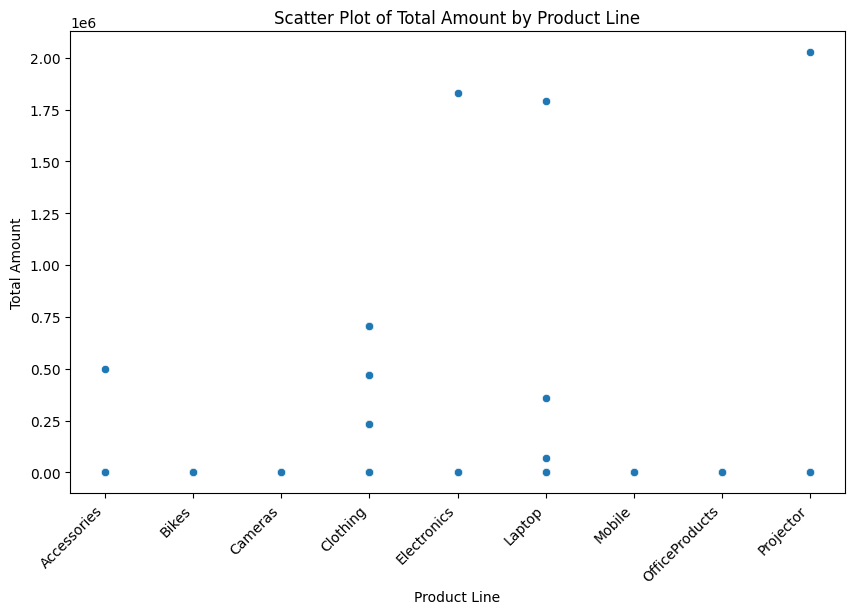

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_line', y='total_amount')
plt.title('Scatter Plot of Total Amount by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


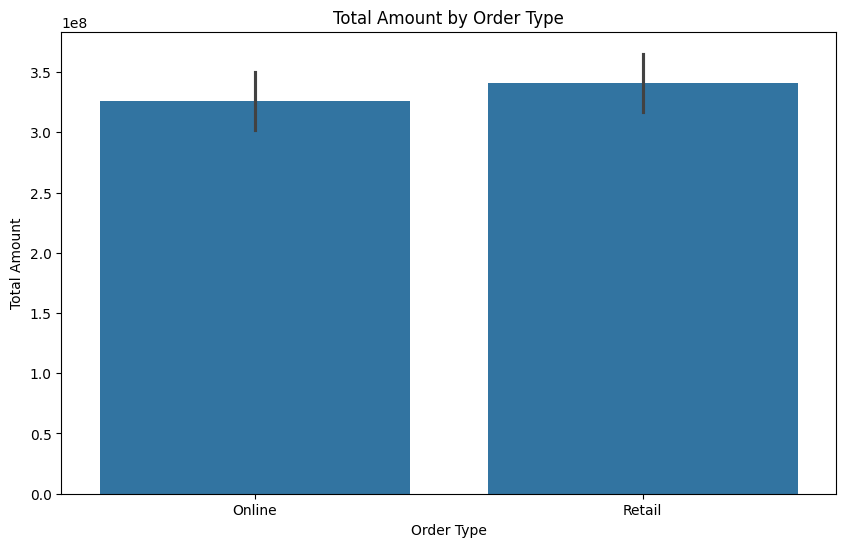

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='order_type', y='total_amount', estimator=sum)
plt.title('Total Amount by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Total Amount')
plt.show()


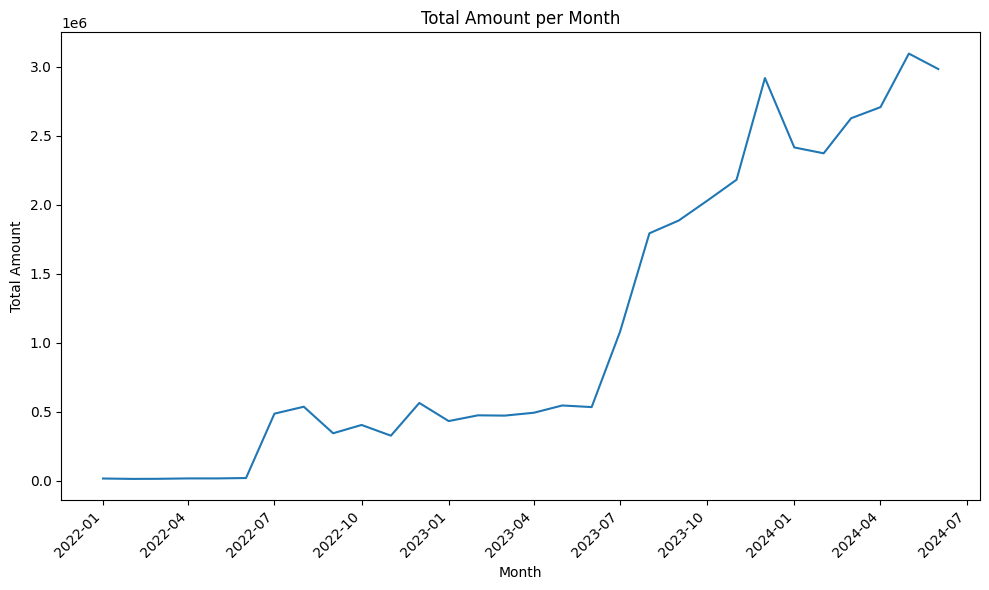

In [47]:
df_clean['total_amount'] = df_clean['product_price'] * df_clean['quantity']

monthly_revenue = df_clean.groupby('order_year_month')['total_amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Amount per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  


In [48]:
numerical_cols = df_clean.select_dtypes(include=['number'])

if 'total_amount' in numerical_cols.columns:
    numerical_cols = numerical_cols.drop(columns=['total_amount'])
covariance_matrix = numerical_cols.cov()
covariance_matrix

,order_id,quantity,product_price,order_year
order_id,5.248669e+07,345.524284,-917814.701629,3524.946649
quantity,3.455243e+02,0.374637,-207.274419,0.028314
product_price,-9.178147e+05,-207.274419,514294.122369,-70.976494
order_year,3.524947e+03,0.028314,-70.976494,0.309871


Based on the covariance matrix we can see how the independent or the numerical columns in the dataset affect one another. Order IDs and Quantities are positively related, but not in an extreme way.There is a strong negative relationship between order ID and product price, suggesting that newer orders tend to be for cheaper products.There is a moderate negative correlation between quantity ordered and product price, suggesting that larger orders are associated with cheaper products. Over time, product prices seem to be decreasing and there is no strong trend in quantity ordered as the years go by.